In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd .read_csv('mid-term/Placement_Data_Full_Class.csv')

In [4]:
df.head()

,sl_no,gender,ssc_p,ssc_b,hsc_p,hsc_b,hsc_s,degree_p,degree_t,workex,etest_p,specialisation,mba_p,status,salary
0,1,M,67.00,Others,91.00,Others,Commerce,58.00,Sci&Tech,No,55.0,Mkt&HR,58.80,Placed,270000.0
1,2,M,79.33,Central,78.33,Others,Science,77.48,Sci&Tech,Yes,86.5,Mkt&Fin,66.28,Placed,200000.0
2,3,M,65.00,Central,68.00,Central,Arts,64.00,Comm&Mgmt,No,75.0,Mkt&Fin,57.80,Placed,250000.0
3,4,M,56.00,Central,52.00,Central,Science,52.00,Sci&Tech,No,66.0,Mkt&HR,59.43,Not Placed,NaN
4,5,M,85.80,Central,73.60,Central,Commerce,73.30,Comm&Mgmt,No,96.8,Mkt&Fin,55.50,Placed,425000.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   sl_no           215 non-null    int64  
 1   gender          215 non-null    object 
 2   ssc_p           213 non-null    float64
 3   ssc_b           213 non-null    object 
 4   hsc_p           215 non-null    float64
 5   hsc_b           215 non-null    object 
 6   hsc_s           208 non-null    object 
 7   degree_p        208 non-null    float64
 8   degree_t        208 non-null    object 
 9   workex          208 non-null    object 
 10  etest_p         213 non-null    float64
 11  specialisation  213 non-null    object 
 12  mba_p           215 non-null    float64
 13  status          215 non-null    object 
 14  salary          148 non-null    float64
dtypes: float64(6), int64(1), object(8)
memory usage: 25.3+ KB


In [6]:
df.describe()

,sl_no,ssc_p,hsc_p,degree_p,etest_p,mba_p,salary
count,215.000000,213.000000,215.000000,208.000000,213.000000,215.000000,148.000000
mean,108.000000,67.409531,66.333163,66.269663,72.110892,62.278186,288655.405405
std,62.209324,10.815114,10.897509,7.176998,13.309323,5.833385,93457.452420
min,1.000000,40.890000,37.000000,50.000000,50.000000,51.210000,200000.000000
25%,54.500000,61.000000,60.900000,61.000000,60.000000,57.945000,240000.000000
50%,108.000000,67.000000,65.000000,66.000000,71.000000,62.000000,265000.000000
75%,161.500000,76.000000,73.000000,72.000000,84.000000,66.255000,300000.000000
max,215.000000,89.400000,97.700000,85.000000,98.000000,77.890000,940000.000000


In [7]:
df.isnull().sum()

sl_no              0
gender             0
ssc_p              2
ssc_b              2
hsc_p              0
hsc_b              0
hsc_s              7
degree_p           7
degree_t           7
workex             7
etest_p            2
specialisation     2
mba_p              0
status             0
salary            67
dtype: int64

In [8]:
numerical_columns = ['ssc_p', 'degree_p', 'etest_p', 'salary']
df[numerical_columns] = df[numerical_columns].fillna(df[numerical_columns].mean())

In [9]:
categorical_columns = ['ssc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation']
df[categorical_columns] = df[categorical_columns].apply(lambda col: col.fillna(col.mode()[0]))

In [10]:
categorical_features = ['gender', 'ssc_b', 'hsc_b', 'hsc_s', 'degree_t', 'workex', 'specialisation', 'status']
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

In [11]:
from sklearn.preprocessing import StandardScaler

In [12]:
numerical_columns_to_normalize = ['ssc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']
scaler = StandardScaler()
df_encoded[numerical_columns_to_normalize] = scaler.fit_transform(df_encoded[numerical_columns_to_normalize])

print(df_encoded.shape)
print(df_encoded.head())

(215, 17)
   sl_no     ssc_p  hsc_p  degree_p   etest_p     mba_p        salary  \
0      1 -0.038133  91.00 -1.174300 -1.294697 -0.597647 -2.414078e-01   
1      2  1.109976  78.33  1.591878  1.088753  0.687620 -1.147234e+00   
2      3 -0.224364  68.00 -0.322294  0.218605 -0.769474 -5.002152e-01   
3      4 -1.062400  52.00 -2.026306 -0.462381 -0.489396 -7.532285e-16   
4      5  1.712431  73.60  0.998314  1.868103 -1.164676  1.764349e+00   

   gender_M  ssc_b_Others  hsc_b_Others  hsc_s_Commerce  hsc_s_Science  \
0      True          True          True            True          False   
1      True         False          True           False           True   
2      True         False         False           False          False   
3      True         False         False           False           True   
4      True         False         False            True          False   

   degree_t_Others  degree_t_Sci&Tech  workex_Yes  specialisation_Mkt&HR  \
0            False            

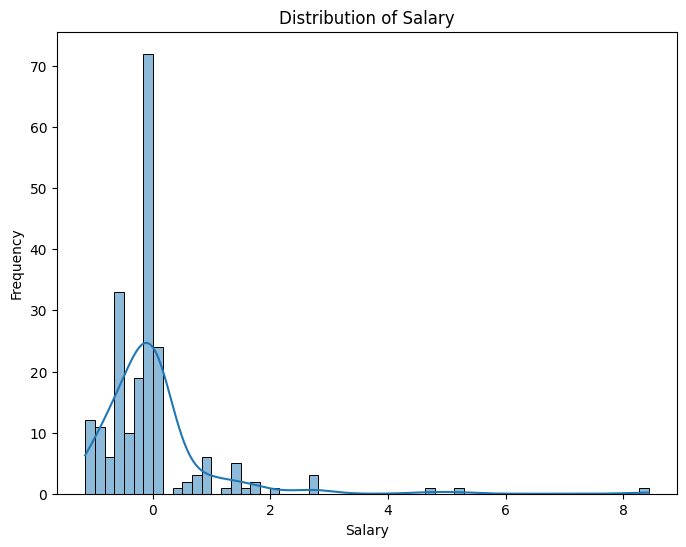

In [13]:
plt.figure(figsize=(8, 6))
sns.histplot(df_encoded['salary'], kde=True)
plt.title('Distribution of Salary')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

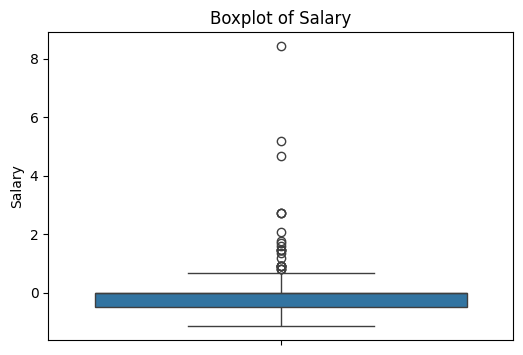

In [14]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=df_encoded['salary'])
plt.title('Boxplot of Salary')
plt.ylabel('Salary')
plt.show()

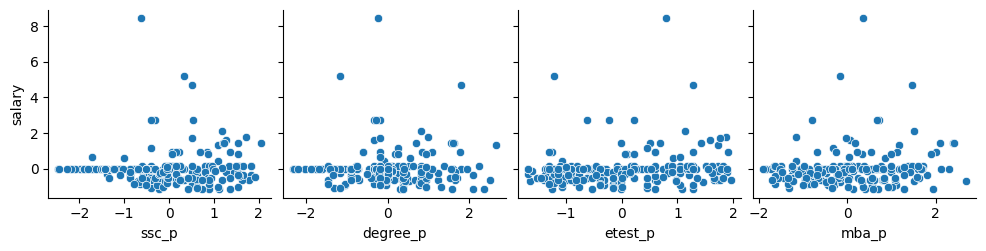

In [15]:
sns.pairplot(df_encoded, x_vars=['ssc_p', 'degree_p', 'etest_p', 'mba_p'], y_vars=['salary'], kind='scatter')
plt.show()

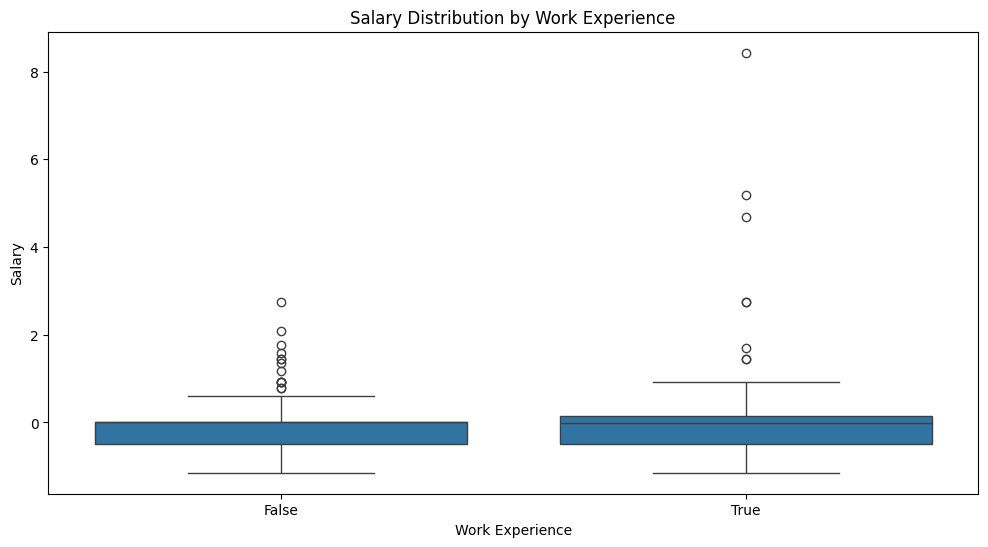

In [16]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='workex_Yes', y='salary', data=df_encoded)
plt.title('Salary Distribution by Work Experience')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.show()

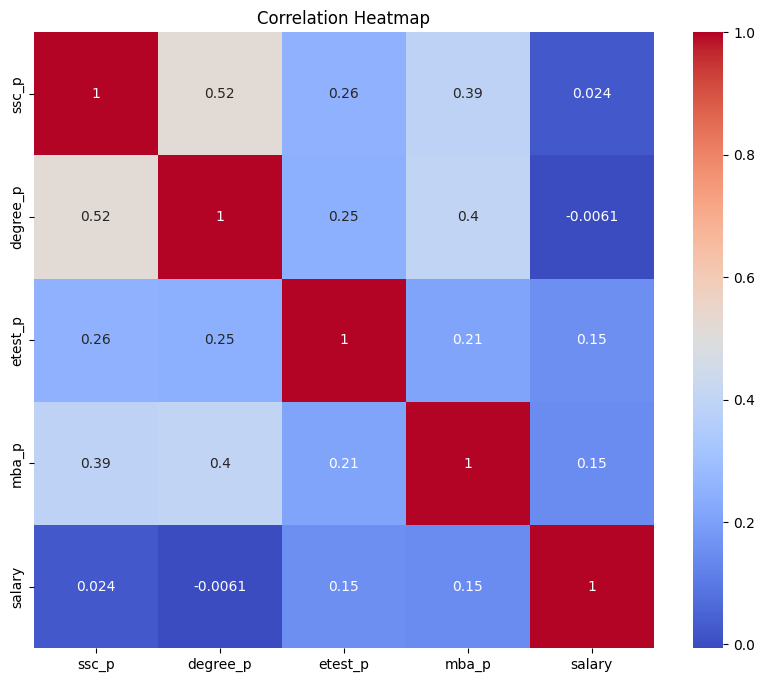

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(df_encoded[['ssc_p', 'degree_p', 'etest_p', 'mba_p', 'salary']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

* salary distribution is right-skewed

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X = df_encoded.drop(columns=['salary'])
y = df_encoded['salary']

In [20]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size= 0.2,random_state=0)

In [25]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
knn = KNeighborsClassifier(n_neighbors=5)

In [26]:
knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [27]:
y_pred = knn.predict(X_test)
y_pred

array([-0.40017213,  0.21409314,  0.24684626,  0.57633601, -0.19401808,
       -0.03784183,  0.17268396, -0.30610965, -0.17420533,  0.84040695,
        0.10280598, -0.42774911,  0.35982966, -0.28808057, -0.21900698,
       -0.25782809, -0.17759781,  0.11048276,  0.89386466,  0.31502801,
        0.57633601, -0.47951058, -0.47692251, -0.02838137,  0.59106005,
        0.01650771, -0.11637588,  0.02079202, -0.27076846, -0.47433443,
       -0.24488772, -0.26728855, -0.42774911,  0.13984341, -0.31905002,
        0.7092196 ,  0.12949111,  0.89386466,  1.12679128, -0.30271717,
        0.21400571, -0.01892092, -0.20258671])

In [28]:
pd.DataFrame({'y_test':y_test,'y_pred':y_pred})

,y_test,y_pred
198,-7.532285e-16,-0.400172
37,4.056106e-01,0.214093
89,-1.017830e+00,0.246846
168,-7.532285e-16,0.576336
171,1.739955e-02,-0.194018
75,-7.532285e-16,-0.037842
96,1.468032e-01,0.172684
137,-8.237244e-01,-0.306110
5,-7.532285e-16,-0.174205
83,1.468032e-01,0.840407


In [29]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)


print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R2): {r2}")

Mean Absolute Error (MAE): 0.47623075316611724
Mean Squared Error (MSE): 0.3942604402927024
Root Mean Squared Error (RMSE): 0.6279016167304416
R-squared (R2): -0.5544621357326591
